# (1)   **Import Library**





In [1]:
import os
import shutil, sys
import numpy as np
import pandas as pd 
import random

import keras
from keras.models import Sequential
# 卷積層、池化層
from keras.layers import Conv2D, MaxPooling2D
# 神經網絡隨機拋棄、批次標準化、激活函數、平坦層
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten
# 神經網絡正規化
from keras.regularizers import l1, l2, l1_l2 
# 優化器(Optimizer)
from keras.optimizers import RMSprop, Adam
# 隨機重新排列資料序列，再次建立餵入模型的批次資料
from sklearn.utils import shuffle
# Early Stopping、Learning Rate Reduction
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# 訓練模型時，利用 callback 紀錄或修改訓練過程
from keras.callbacks import Callback
# 自訂損失函數
import tensorflow as tf
import keras.backend as K


from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# (2) Acquire Google Drive Authorization

In [2]:
from google.colab import drive
drive.mount( '/content/gdrive' )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# (3) Download Kaggle Dataset 

## (3.1) Upload Kaggle API ( for downloading the Kaggle dataset )

In [0]:
from google.colab import files
uploaded = files.upload( )

## (3.2) Set up Kaggle Package ( for using Kaggle.json )

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
# we need to set permissions 
!chmod 600 /root/.kaggle/kaggle.json

## (3.3) Download Kaggle Dataset

In [0]:
# Download Data from Kaggle
# data webpage in Kaggle --> copy API

!kaggle competitions download -c ml-marathon-final

In [0]:
# 解壓縮 data.zip
'''   
檔案解壓縮至資料夾 語法：
!unzip -q 檔案名稱.zip -d 資料夾名稱   
'''

!unzip -q data.zip   # unzip data.zip

## (3.4) Set up Kaggle Train and Test Dataset

### (3.4.1) Train Dataset  
先將貓與狗的測試集照片，複製到同一個新的資料夾中，再將這個新資料夾移動至上層路徑。

In [43]:
# 指定目錄中的所有檔案名稱和目錄名稱
os.listdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/kaggle_dogcat/train' )

['dogs', 'cats']

In [0]:
'''
複製不同資料夾中的資料到同一資料夾中

註 ：os.chdir( ) – 變更目錄到指定的目錄
'''

# Step 1: 建立新資料夾 
os.chdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/kaggle_dogcat/train' )
!mkdir -p Training_Data  # 新資料夾的名稱：Training_Data 

# Step 2: 複製資料至新資料夾中 
os.chdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/kaggle_dogcat/train/dogs' )
!cp dog.?.jpg dog.??.jpg dog.???.jpg dog.????.jpg dog.?????.jpg ../Training_Data
os.chdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/kaggle_dogcat/train/cats' )
!cp cat.?.jpg cat.??.jpg cat.???.jpg cat.????.jpg cat.?????.jpg ../Training_Data

In [49]:
''' 
移動資料夾 

註 ：os.path.abspath() – 得到資料夾的絕對路徑
'''

# Step 1: 原本資料夾的路徑
oldpos = os.path.abspath( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/kaggle_dogcat/train/Training_Data' )

# Step 2: 欲將資料夾搬移到的目錄
newpos = os.path.abspath( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/' )

# Step 3: 搬移資料夾
shutil.move( oldpos, newpos )

'/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/Training_Data'

In [0]:
filenames = os.listdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/Training_Data' )
print( 'Numbers of Kaggle Test Data = ', len( filenames ) )

### (3.4.2) Test Dataset 

In [0]:
'''
複製測試集資料到新的資料夾中
'''

# Step 1: 建立新資料夾 
os.chdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/kaggle_dogcat/' )
!mkdir -p Testing_Data  # 新資料夾的名稱：Testing_Data 

# Step 2: 複製資料至新資料夾中 
os.chdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/kaggle_dogcat/test' )
!cp ???.jpg ../Testing_Data

In [4]:
''' 
移動新的測試集資料夾 
'''

# Step 1: 原本資料夾的路徑
oldpos_test = os.path.abspath( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/kaggle_dogcat/Testing_Data' )

# Step 2: 欲將資料夾搬移到的目錄
newpos_test = os.path.abspath( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/' )

# Step 3: 搬移資料夾
shutil.move( oldpos_test, newpos_test )

'/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/Testing_Data'

In [5]:
test_filenames = os.listdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/Testing_Data' )
print( 'Numbers of Kaggle Test Data = ', len( test_filenames ) )

Numbers of Kaggle Test Data =  400


# (4) Prepare Traning and Validation Data

In [0]:
os.chdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/' )

## (4.1) Label Kaggle Train Dataset

In [4]:
filenames = os.listdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/Training_Data' )
print( 'Numbers of Kaggle Train Data = ', len( filenames ) )

Numbers of Kaggle Train Data =  4000


In [5]:
categories = [ ]

for filename in filenames:
    category = filename.split( '.' )[0]
    if category == 'dog':
        categories.append( 0 )  # label of dog = 0
    else:
        categories.append( 1 )  # label of cat = 1

df = pd.DataFrame( { 'filename': filenames, 'category': categories } )
df[ 'category' ] = df[ 'category' ].replace( { 0: 'dog', 1: 'cat' } )

print( 'The first 5 pictures : ' '\n' )
print( df.head( ) )

print( '\n' '======================' '\n' )

print( 'The last 5 pictures : ' '\n' )
print( df.head( ) )

The first 5 pictures : 

       filename category
0  cat.5505.jpg      cat
1  cat.5507.jpg      cat
2  cat.5509.jpg      cat
3  cat.5510.jpg      cat
4  cat.5513.jpg      cat


The last 5 pictures : 

       filename category
0  cat.5505.jpg      cat
1  cat.5507.jpg      cat
2  cat.5509.jpg      cat
3  cat.5510.jpg      cat
4  cat.5513.jpg      cat


## (4.2) Split Kaggle Train Dataset into Random Training and Validation Subsets

In [6]:
train_df, validate_df = train_test_split( df, train_size = 0.9, shuffle = True, random_state = 42 )  
train_df = train_df.reset_index( drop = True )
validate_df = validate_df.reset_index( drop = True )

print( 'Numbers of Train Data = ', train_df.shape[0]  )
print( 'Numbers of Validation Data = ', validate_df.shape[0]  )

Numbers of Train Data =  3600
Numbers of Validation Data =  400


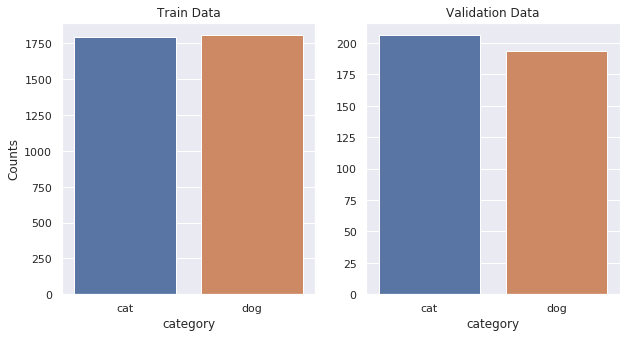

In [7]:
import seaborn as sns 
plt.style.use( 'ggplot' )   # 設定圖型風格
sns.set( color_codes = True )

train_df_counts = train_df.groupby( [ 'category' ] ).count( ).reset_index( )
x1 = train_df_counts[ 'category' ]
y1 = train_df_counts[ 'filename' ]

validate_df_counts = validate_df.groupby( [ 'category' ] ).count( ).reset_index( )
x2 = validate_df_counts[ 'category' ]
y2 = validate_df_counts[ 'filename' ]


# plot the barplot
fig, axs = plt.subplots( 1, 2, figsize = ( 10, 5 ) )
plt.suptitle( '' )

plt.subplot( 1, 2, 1 )
sns.barplot( x1, y1 )
plt.ylabel( 'Counts' )
plt.title( 'Train Data' )

plt.subplot( 1, 2, 2 )
sns.barplot( x2, y2 )
plt.ylabel( '' )
plt.title( 'Validation Data' )

plt.show( ) 

# (5) Data Augmentation

## (5.1) Define Constants

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = ( IMAGE_WIDTH, IMAGE_HEIGHT )
IMAGE_CHANNELS = 3

BATCH_SIZE = 8

## (5.2) Traning Generator

In [9]:
train_datagen = ImageDataGenerator( featurewise_center = True, # 將資料的均值設為 0
                                    featurewise_std_normalization = True,  # 資料標準化
                                    rescale = 1./255, 
                                    rotation_range = 40,       # 隨機旋轉度數的範圍
                                    shear_range = 0.2,
                                    zoom_range = 0.2,                                   
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    horizontal_flip = True,    # 隨機水平翻轉
                                    vertical_flip = False      # 隨機垂直翻轉
                                    )

train_generator = train_datagen.flow_from_dataframe( train_df, 
                                                     directory = '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/Training_Data/', 
                                                     x_col = 'filename',
                                                     y_col = 'category',
                                                     target_size = IMAGE_SIZE,
                                                     class_mode = 'categorical',
                                                     batch_size = BATCH_SIZE
                                                     )

Found 3600 validated image filenames belonging to 2 classes.


## (5.3) Validation Generator

In [10]:
valid_datagen = ImageDataGenerator( rescale = 1./255 )

validation_generator = valid_datagen.flow_from_dataframe( validate_df, 
                                                          directory = '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/Training_Data/', 
                                                          x_col = 'filename',
                                                          y_col = 'category',
                                                          target_size = IMAGE_SIZE,
                                                          class_mode = 'categorical',
                                                          batch_size = BATCH_SIZE
                                                          )

Found 400 validated image filenames belonging to 2 classes.


# **Define Hyper-parameters**

In [0]:
# Early Stopping
PATIENCE = 15  

# Learning Rate Reduction
REDUCE_LR_FACTOR = 0.5  
REDUCE_LR_PATIENCE = 3    

# Optimizer
LEARNING_RATE = 1e-3

# (6) Build Model

In [12]:
model = Sequential( )

model.add( Conv2D( 32, (3, 3), 
                   activation = 'relu', 
                   input_shape = ( IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS )
                   ) )

model.add( BatchNormalization( ) )
model.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )
model.add( Dropout( rate = 0.25 ) )

model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( BatchNormalization( ) )
model.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )
model.add( Dropout( rate = 0.25 ) )

model.add( Conv2D( 128, (3, 3), activation = 'relu' ) )
model.add( BatchNormalization( ) )
model.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )
model.add( Dropout( rate = 0.25 ) )

model.add( Flatten() )
model.add( Dense( 512, activation = 'relu' ) )
model.add( BatchNormalization( ) )
model.add( Dropout( rate = 0.25 ) )
model.add( Dense( 512, activation = 'relu' ) )
model.add( BatchNormalization( ) )
model.add( Dropout( rate = 0.25 ) )
model.add( Dense( 256, activation = 'relu' ) )
model.add( BatchNormalization( ) )
model.add( Dropout( rate = 0.25 ) )
model.add( Dense( 2, activation = 'softmax' ) ) # 2 because we have cat and dog classes


model.summary( )

W0818 13:50:38.368038 140134396168064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 13:50:38.415456 140134396168064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 13:50:38.422453 140134396168064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 13:50:38.471706 140134396168064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0818 13:50:38.473041 1401343961

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
__________

# (7) Callbacks  

  * Early Stopping
  * Learning Rate Reduction

##  (7.1) Early Stopping  
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased.

In [0]:
Early_Stopping = EarlyStopping( monitor = 'val_loss', 
                                patience = PATIENCE,  # 容忍訓練無再改善時的 EPOCHS 次數
                                verbose = 1
                                )  

## (7.2) Learning Rate Reduction   
Reduce the learning rate when then accuracy not increase for 2 steps.


In [0]:
LR_Reduction = ReduceLROnPlateau( factor = REDUCE_LR_FACTOR,
                                  min_lr = 1e-5, # lower bound on lr
                                  monitor = 'val_acc', 
                                  patience = REDUCE_LR_PATIENCE, 
                                  verbose = 1  
                                  )

## (7.3) Define Callbacks

In [0]:
Callbacks = [ Early_Stopping, LR_Reduction ]

# (8) Optimizer

In [16]:
model.compile( loss = 'categorical_crossentropy', 
               optimizer = RMSprop( lr = LEARNING_RATE ), 
               metrics = [ 'accuracy' ]
               )

W0818 13:50:42.501359 140134396168064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



# (9) Fit Model

In [17]:
FAST_RUN = False  

EPOCHS = 5 if FAST_RUN else 50

history = model.fit_generator( train_generator, 
                               epochs = EPOCHS,
                               validation_data = validation_generator,
                               validation_steps = validate_df.shape[0] // BATCH_SIZE,
                               steps_per_epoch = train_df.shape[0] // BATCH_SIZE,
                               callbacks = Callbacks
                               )

W0818 13:50:42.651789 140134396168064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


450/450 [==============================] - 1329s 3s/step - loss: 0.9626 - acc: 0.5292 - val_loss: 0.8484 - val_acc: 0.5400
Epoch 2/50
450/450 [==============================] - 67s 148ms/step - loss: 0.7492 - acc: 0.5456 - val_loss: 0.9856 - val_acc: 0.5350
Epoch 3/50
450/450 [==============================] - 67s 150ms/step - loss: 0.7078 - acc: 0.5636 - val_loss: 0.7055 - val_acc: 0.5550
Epoch 4/50
450/450 [==============================] - 67s 149ms/step - loss: 0.7149 - acc: 0.5250 - val_loss: 0.7271 - val_acc: 0.5100
Epoch 5/50
450/450 [==============================] - 67s 148ms/step - loss: 0.6973 - acc: 0.5586 - val_loss: 0.6953 - val_acc: 0.5375
Epoch 6/50
450/450 [==============================] - 67s 148ms/step - loss: 0.6841 - acc: 0.5853 - val_loss: 0.6688 - val_acc: 0.5675
Epoch 7/50
450/450 [==============================] - 66s 148ms/step - loss: 0.6743 - acc: 0.5911 - val_loss: 0.6750 - val_acc: 0.5725
Epoch 8/50
450/450 [==============================] - 67s 149ms/ste

# (10) Virtualize Training

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
W0818 15:07:01.869895 140134396168064 legend.py:1289] No handles with labels found to put in legend.


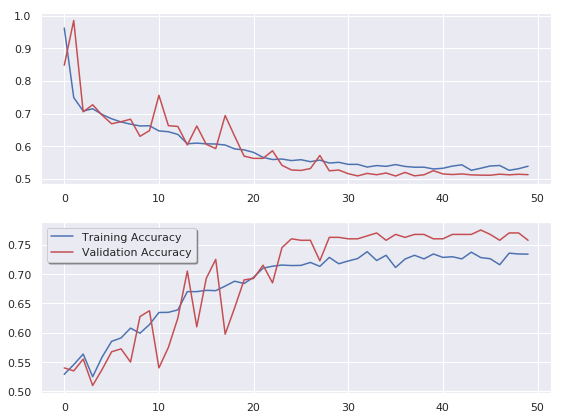

In [18]:
fig, (ax1, ax2) = plt.subplots( 2, 1, figsize = ( 8, 6 ) )

ax1.plot( history.history[ 'loss' ], color = 'b', label = 'Training Loss' )
ax1.plot( history.history[ 'val_loss' ], color = 'r', label = 'Validation Loss' )
#ax1.set_xticks( np.arange( 1, EPOCHS, 1 ) )
#ax1.set_yticks( np.arange( 0, 1, 0.1 ) )
legend = plt.legend( loc = 'best', shadow = True )
plt.tight_layout( )

ax2.plot( history.history[ 'acc' ], color = 'b', label = 'Training Accuracy' )
ax2.plot( history.history[ 'val_acc' ], color = 'r',label = 'Validation Accuracy' )
#ax2.set_xticks( np.arange( 1, EPOCHS, 1 ) )
legend = plt.legend( loc = 'best', shadow = True )
plt.tight_layout( )


plt.show( )

#  (11) Save Model

In [0]:
model.save( 'CNN_for_cat_and_dog.h5' )

# (12) Prediction

In [20]:
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.preprocessing import image

# load trained model
os.chdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/' )
Model = load_model( 'CNN_for_cat_and_dog.h5' )

# dogs = 0; cats = 1
cls_list = [ 'dog', 'cat' ] 

# create an empty dataframe for submit
Submission = pd.DataFrame( )
Submission[ 'ID' ] = [ 'Prediction' ]

# predict all photos (loop though the folder)
directory = os.fsencode( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/Testing_Data/' )
for f in os.listdir( directory ):
    f = os.fsdecode( f )
    img = image.load_img( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam/Testing_Data/' + str(f), target_size = ( 224, 224 ) )
    if img is None :
        continue
    x = image.img_to_array( img )
    x = np.expand_dims( x, axis = 0 )
    pred = Model.predict(x)[0]
    
    # collect all predicted results 
    Submission[ f[0:3] ] = [ pred[1] ]
    
    top_inds = pred.argsort()[::-1][:5]
    print( f )
    for i in top_inds:
        print('    {:.3f}  {}'.format( pred[i], cls_list[i] ) )

000.jpg
    1.000  dog
    0.000  cat
001.jpg
    1.000  dog
    0.000  cat
002.jpg
    1.000  dog
    0.000  cat
003.jpg
    1.000  dog
    0.000  cat
004.jpg
    1.000  cat
    0.000  dog
005.jpg
    1.000  dog
    0.000  cat
006.jpg
    1.000  dog
    0.000  cat
007.jpg
    1.000  dog
    0.000  cat
008.jpg
    1.000  dog
    0.000  cat
009.jpg
    1.000  cat
    0.000  dog
010.jpg
    1.000  cat
    0.000  dog
011.jpg
    1.000  dog
    0.000  cat
012.jpg
    1.000  dog
    0.000  cat
013.jpg
    1.000  dog
    0.000  cat
014.jpg
    1.000  dog
    0.000  cat
015.jpg
    1.000  dog
    0.000  cat
016.jpg
    1.000  cat
    0.000  dog
017.jpg
    1.000  dog
    0.000  cat
018.jpg
    1.000  cat
    0.000  dog
019.jpg
    1.000  dog
    0.000  cat
020.jpg
    1.000  dog
    0.000  cat
021.jpg
    1.000  dog
    0.000  cat
022.jpg
    1.000  dog
    0.000  cat
023.jpg
    1.000  dog
    0.000  cat
024.jpg
    1.000  dog
    0.000  cat
025.jpg
    1.000  cat
    0.000  dog
026.jpg
    

In [21]:
import copy


Submit_Data = copy.deepcopy( Submission )

Submit_Data.drop( columns = [ 'ID' ], inplace = True )
Submit_Data = Submission.loc[ 0, : ].to_frame( )
Submit_Data.reset_index( inplace = True )
Submit_Data.columns = [ 'ID', 'Predicted' ]
Submit_Data.sort_values( by = 'ID', inplace = True )

# delete the last row of dataframe, and then reset index
Submit_Data = Submit_Data[ : -1 ].set_index( ['ID'] ).reset_index( ) 


print( 'The first 5 prdictions : ' '\n' )
print( Submit_Data.head( ) )

print( '\n' '======================' '\n' )

print( 'The last 5 prdictions : ' '\n' )
print( Submit_Data.tail( ) )

The first 5 prdictions : 

    ID Predicted
0  000         0
1  001         0
2  002         0
3  003         0
4  004         1


The last 5 prdictions : 

      ID Predicted
395  395         0
396  396         1
397  397         0
398  398         0
399  399         0


# (13) Download the Submission from Colab

In [0]:
from google.colab import files

os.chdir( '/content/gdrive/My Drive/ML_100_Marathon_Final_Exam' )
Submit_Data.to_csv( 'Submission_CNN_Model_v1.csv', header = True, index = False, encoding = 'utf-8' )
files.download( 'Submission_CNN_Model_v1.csv' )